# Challenge: Rick and Morty API

![](http://as01.epimg.net/epik/imagenes/2019/02/12/portada/1549970850_227267_1549973816_noticia_normal.jpg)


**In this challenge, you'll develop codes to parse and analyze data returned from the [Rick and Morty API](https://rickandmortyapi.com/).** The workflow is almost the same as in the guided lesson but you'll work with different data.

## Obtaining the link

Wrote your codes in the cell below to obtain the data from the API endpoint you choose. A recap of the workflow:

1. Examine the webpages and choose one that you want to work with.

1. Use Google Chrome's DevTools to inspect the XHR network requests. Find out the API endpoint that serves data to the webpage.

1. Test the API endpoint in the browser to verify its data.

1. Change the page number offset of the API URL to test if it's working.

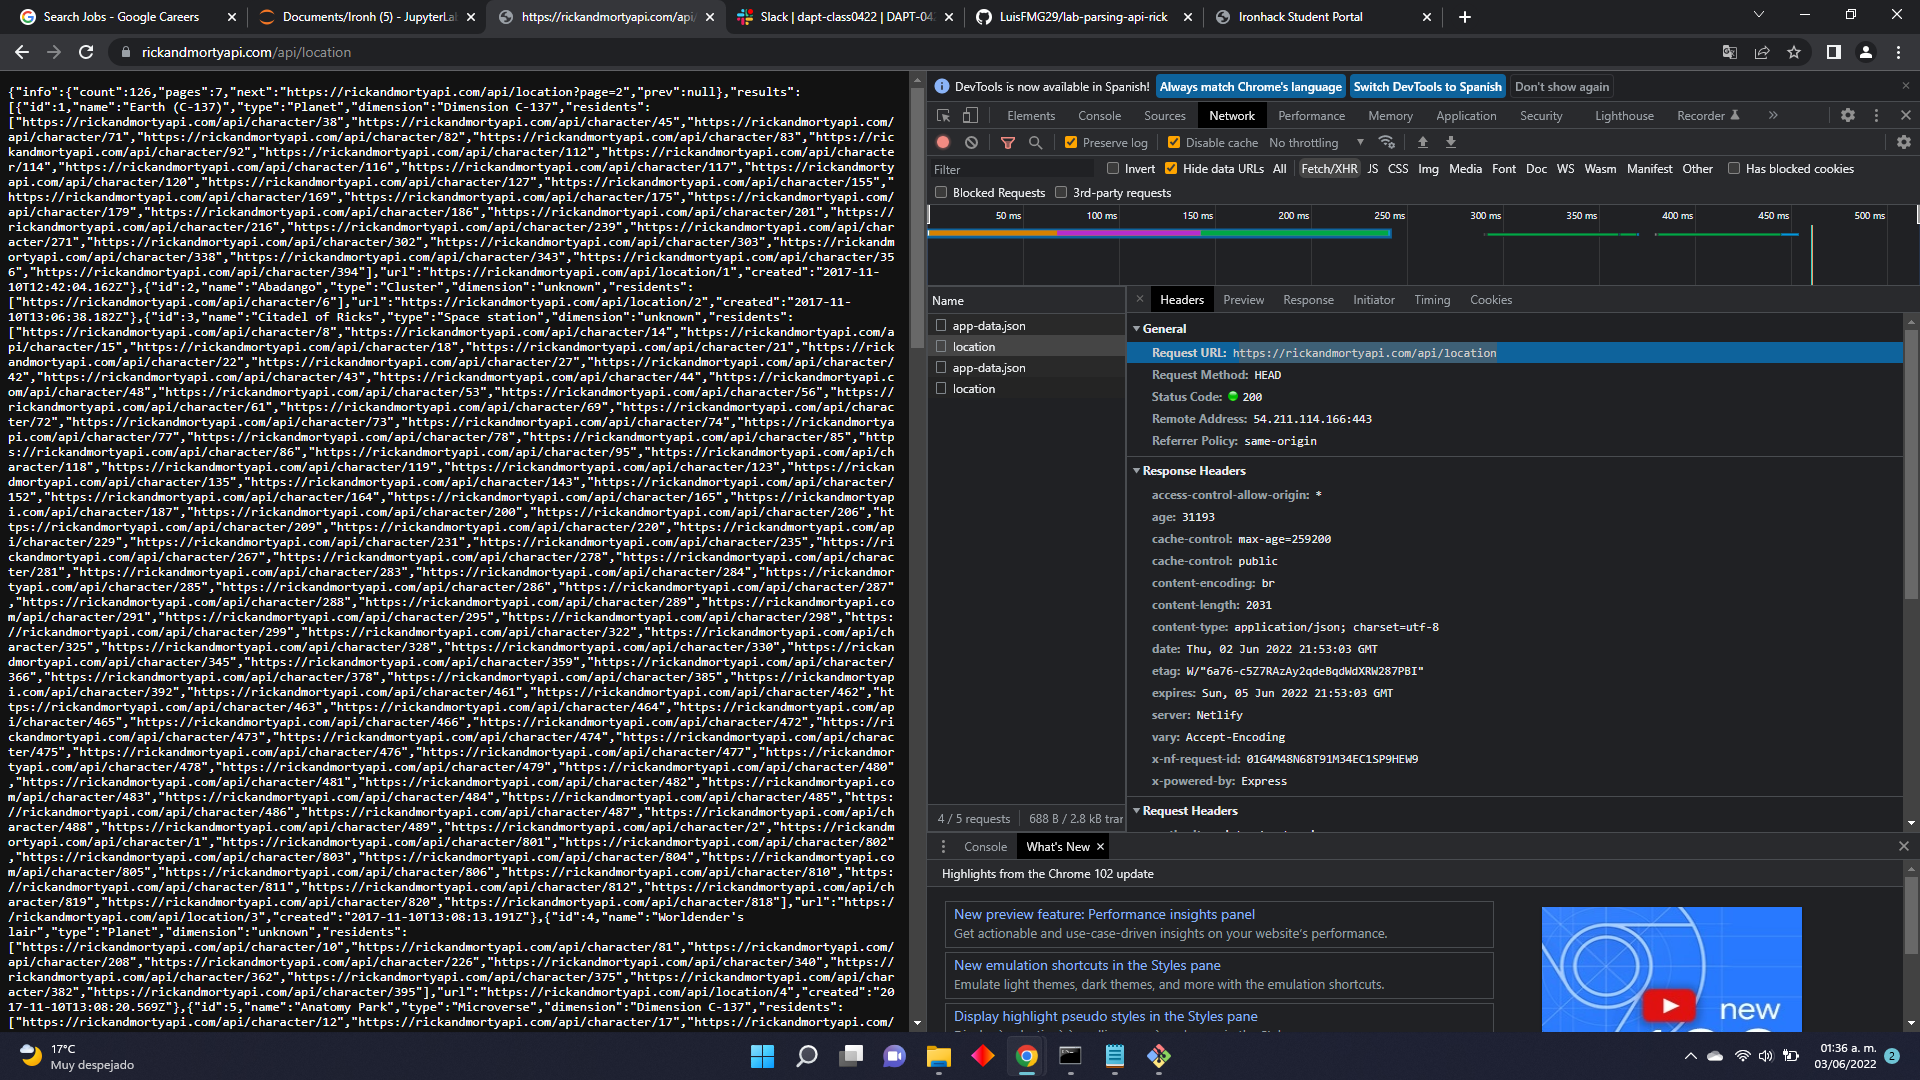

## Reading the data

In the next cell, use Python to obtain data from the API endpoint you chose in the previous step. Workflow:

1. Import libraries.

1. Define the initial API endpoint URL.

1. Make request to obtain data of the 1st page. Flatten the data and store it in an empty object variable.

1. Find out the total page count in the 1st page data.

1. Use a FOR loop to make requests for the additional pages from 2 to page count. Append the data of each additional page to the flatterned data object.

1. Print and review the data you obtained.

In [1]:
# your code here
import json
import requests
import pandas as pd
from pandas.io.json import json_normalize

In [11]:
url='https://rickandmortyapi.com/api/location/'

In [13]:
response = requests.get(url)
results = response.json()
results


flattened_data = pd.json_normalize(results)
flattened_data
#tiene un total de 126 page count

,results,info.count,info.pages,info.next,info.prev
0,"[{'id': 1, 'name': 'Earth (C-137)', 'type': 'P...",126,7,https://rickandmortyapi.com/api/location/?page=2,None


In [26]:
response = requests.get(url+'1')
results = response.json()

flattened_data = pd.json_normalize(results)
flattened_data

,id,name,type,dimension,residents,url,created
0,1,Earth (C-137),Planet,Dimension C-137,"[https://rickandmortyapi.com/api/character/38,...",https://rickandmortyapi.com/api/location/1,2017-11-10T12:42:04.162Z


In [27]:
for i in range (2,4):
    response = requests.get(url+f'{i}')
    results = response.json()
    flattened_data=flattened_data.append(pd.json_normalize(results))

In [28]:
flattened_data

,id,name,type,dimension,residents,url,created
0,1,Earth (C-137),Planet,Dimension C-137,"[https://rickandmortyapi.com/api/character/38,...",https://rickandmortyapi.com/api/location/1,2017-11-10T12:42:04.162Z
0,2,Abadango,Cluster,unknown,[https://rickandmortyapi.com/api/character/6],https://rickandmortyapi.com/api/location/2,2017-11-10T13:06:38.182Z
0,3,Citadel of Ricks,Space station,unknown,"[https://rickandmortyapi.com/api/character/8, ...",https://rickandmortyapi.com/api/location/3,2017-11-10T13:08:13.191Z


## Bonus

Extract the following information from the data:

* The character who appeared in most episodes (aside from Rick and Morty, of course!).

* The total number of dead characters.

* A list of all character origins (without duplicates).

In [ ]:
# your code here